<a href="https://colab.research.google.com/github/nhattminh160901/1/blob/main/kiem_dinh_t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import pandas as pd
import random
from scipy import stats
from statsmodels.stats.weightstats import ztest
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [57]:
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

In [58]:
warnings.filterwarnings('ignore')

In [59]:
#Sinh ngẫu nhiên 28 mẫu tuân theo phân phối chuẩn có trung bình mẫu là 1 và độ lệch chuẩn là 0.1
mean = 1
std = 0.1
N = 28
samples = np.random.normal(mean, std, N)


In [60]:
#In ra 10 phần tử đầu tiên
print(samples[:10])

[1.13839903 0.93181834 1.14683502 1.0029814  1.08940597 0.89925025
 1.08070329 1.14429123 0.95914709 1.17116322]


In [61]:
#In ra các giá trị max, min của samples
print('Max: ', max(samples))
print('Min: ', min(samples))

Max:  1.1762768756786721
Min:  0.7830132728173245


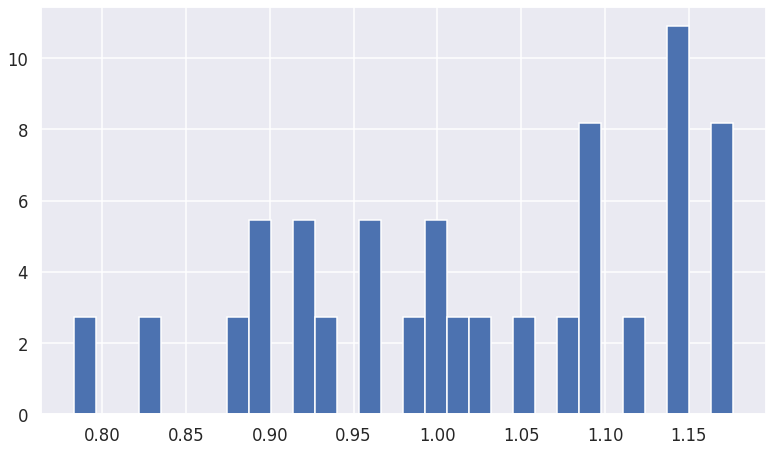

In [62]:
#Vẽ histogram của mẫu vừa được sinh ngẫu nhiên
plt.hist(samples, 30, density=True)
plt.show()

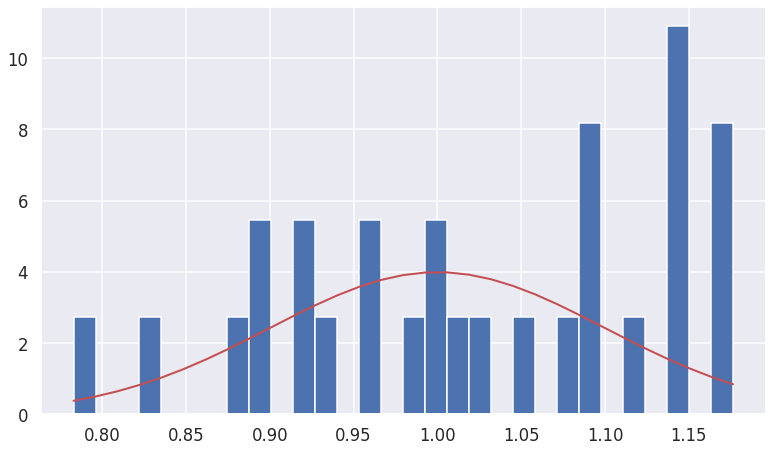

In [63]:
#Vẽ đường phân phối chuẩn cùng với histogram
count, bins, ignored = plt.hist(samples, 30, density=True)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2) ),
         linewidth=2, color='r')
plt.show()

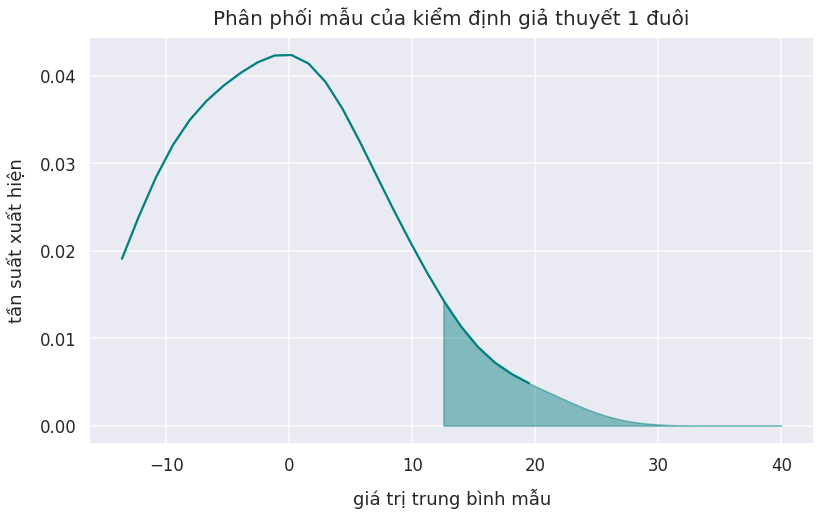

In [64]:
#Sinh ngẫu nhiên 28 mẫu theo phân phối chuẩn có mean = 0 và std = 10
samples = np.random.normal(loc=0, scale=10, size=28)
#Minh họa một đuôi và mức alpha = 0.05
two_std_from_mean = np.mean(samples) + np.std(samples)*1.645
#kernel density
kde = stats.gaussian_kde(samples)
#Trả về 25 giá trị phân bố bằng nhau trong khoảng từ min tới max của samples 
pos = np.linspace(np.min(samples), np.max(samples), 25)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(two_std_from_mean, 40, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal')
plt.title("Phân phối mẫu của kiểm định giả thuyết 1 đuôi", y=1.015, fontsize=20)
plt.xlabel("giá trị trung bình mẫu", labelpad=14)
plt.ylabel("tần suất xuất hiện", labelpad=14);

In [65]:
# Sử dụng hình minh họa
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://media.geeksforgeeks.org/wp-content/uploads/20201028032933/Screenshot37.png", width=300, height=300)

In [66]:
Image(url= "https://media.geeksforgeeks.org/wp-content/uploads/20201028032935/Screenshot38.png", width=300, height=300)

In [67]:

#Sinh ngẫu nhiên một mẫu 15 phần tử có trung bình mẫu là 3.62, độ lệch chuẩn là 0.1
sample1 = np.random.normal(3.62, 0.1, 15)
print(sample1)

[3.86536601 3.70703963 3.71251837 3.66039355 3.80381538 3.70724832
 3.67716006 3.70058867 3.65987878 3.66037254 3.60837287 3.78391046
 3.66504513 3.58534284 3.76236696]


In [68]:
null_mean = 3.5
alpha = 0.01
#Kiểm định t
import statsmodels
ttest, p_value = stats.ttest_1samp(sample1, null_mean)
print('t = ', ttest, '; p = ', p_value)
if(p_value <  alpha):
  print("Có bằng chứng để bác bỏ giả thuyết H0")
else:
  print("Chưa có bằng chứng để bác bỏ giả thuyết H0")

t =  10.643797434890192 ; p =  4.2899771127891854e-08
Có bằng chứng để bác bỏ giả thuyết H0


In [69]:
#Lập trình python minh họa
#Sinh ngẫu nhiên sample A có 15 phần tử với mean = 251, std có hiệu chỉnh = 52,853
samples_A = np.random.normal(251, 52.853, 15)
print(samples_A)
#Sinh ngẫu nhiên sample B có 17 phần tử với mean = 249.2 std = 56.2
samples_B = np.random.normal(249.2, 56.2, 17)
print(samples_B)
#Kiểm định giả thuyết
#T-test cho phương tiện của hai mẫu độc lập từ thống kê mô tả. Từ bài toán trên
alpha1 = 0.01
ttest_score, p_value = stats.ttest_ind_from_stats(mean1 = 251, mean2 = 249.2, std1 = 52.853, std2 = 56.2, nobs1 = 15, nobs2 = 17)
print('t = ', ttest_score, '; p = ', p_value)
if(p_value <  alpha1):
  print("Có bằng chứng để bác bỏ giả thuyết H0")
else:
  print("Chưa có bằng chứng để bác bỏ giả thuyết H0")

[262.91649096 248.04124975 336.14183394 201.11576335 227.93860106
 257.42111867 212.001479   321.47356185 219.72932544 280.52127684
 281.86347678 260.9847782  257.68722243 309.20799099 203.47938436]
[188.11338515 252.80227533 241.78144015 360.95724888 282.22251318
 170.92719199 283.68525777 334.41516105 184.04426765 275.6551199
 271.65507177 283.51476252 282.96658369 254.57377997 220.38307736
 364.63238106 271.55425906]
t =  0.09295431850582912 ; p =  0.9265578548372626
Chưa có bằng chứng để bác bỏ giả thuyết H0


In [70]:
#Kiểm định giả thuyết:
#Tính toán kiểm tra T cho giá trị trung bình của hai mẫu điểm độc lập . 
alpha1 = 0.01
ttest_score1, p_value1 = stats.ttest_ind(samples_A, samples_B, axis=0, equal_var=True, nan_policy='propagate')
print('t_score = ', ttest_score1, '; p_value = ', p_value1)
if(p_value <  alpha1):
  print("Có bằng chứng để bác bỏ giả thuyết H0")
else:
  print("Chưa có bằng chứng để bác bỏ giả thuyết H0")

t_score =  -0.42056474971539237 ; p_value =  0.6770703722424749
Chưa có bằng chứng để bác bỏ giả thuyết H0
